# Debasish Nandy


Intern at THE SPARKS FOUNDATION

Task-1
Predict the percentage of an student based on the no. of study hours.

DATASET-http://bit.ly/w-data
    
INPUT-What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#importing important libraries required for prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Converting data into useable form

In [2]:
study_hours=np.array((2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,
                      5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8
))

In [3]:
scores=np.array((21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86))

The given data -

In [4]:
study_hours

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [5]:
scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Size of Data-

In [6]:
print(study_hours.shape)
print(scores.shape)

(25,)
(25,)


Type of data -

In [7]:
print(study_hours.dtype)
print(scores.dtype)

float64
int32


Text(0, 0.5, 'Scores')

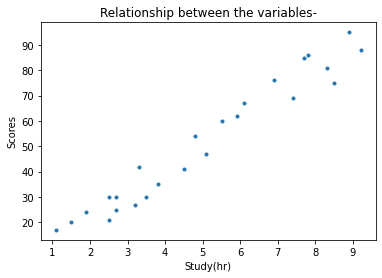

In [8]:
plt.plot(study_hours,scores,'.')
plt.title('Relationship between the variables-')
plt.xlabel('Study(hr)')
plt.ylabel('Scores')

Clearly we can see a linear relationship among them

Converting into Dataframe for suitable operation

In [9]:
df=pd.DataFrame([study_hours,scores],index=['Study(Hours)','Scores'])
df=df.transpose()
df

,Study(Hours),Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


Getting information of the dataframe

In [10]:
df.columns

Index(['Study(Hours)', 'Scores'], dtype='object')

In [11]:
df.describe()

,Study(Hours),Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Study(Hours)  25 non-null     float64
 1   Scores        25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [13]:
df.isnull().sum()#checking null values

Study(Hours)    0
Scores          0
dtype: int64

In [14]:
#Export the DataFrame you created to a .csv file in case you want to load it in future
df.to_csv('Study and scores.csv')

Now we are ready for prediction

In [15]:
'''
X=df['Study(Hours)']
y=df['Scores']
'''
X=df.drop('Scores',axis=1)
y=df.drop('Study(Hours)',axis=1)#“axis 0” represents rows and “axis 1” represents columns.

In [16]:
X

,Study(Hours)
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [17]:
y

,Scores
0,21.0
1,47.0
2,27.0
3,75.0
4,30.0
5,20.0
6,88.0
7,60.0
8,81.0
9,25.0


In [18]:
#Dividing the data into train,test sets
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [19]:
X_train.shape

(20, 1)

In [20]:
#Selecting Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [21]:
#Fitting the data
model.fit(X_train,y_train)

LinearRegression()

In [22]:
#Getting model accuracy
print(f"Accuracy of linear regression model is {model.score(x_test,y_test)*100:.2f}%")

Accuracy of linear regression model is 96.78%


Since the accuracy is 96.78% we can say it's a very good model.

In [23]:
#Predicting values
y_pred=model.predict(x_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [24]:
y_test

,Scores
8,81.0
16,30.0
0,21.0
23,76.0
11,62.0


So, from y_test and y_pred we can see the model's predictions are pretty good.

# Visualisation of the model and its predictions

Text(0, 0.5, 'Scores')

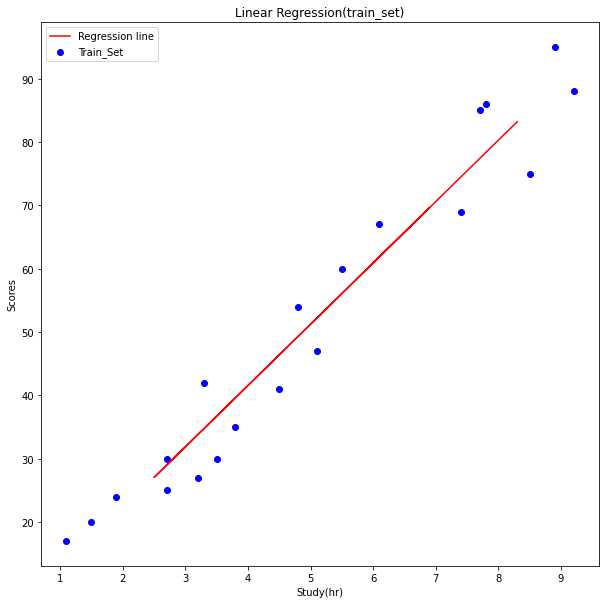

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(X_train,y_train,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.title('Linear Regression(train_set)')
plt.legend(['Regression line','Train_Set'],loc='best')
plt.xlabel('Study(hr)')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

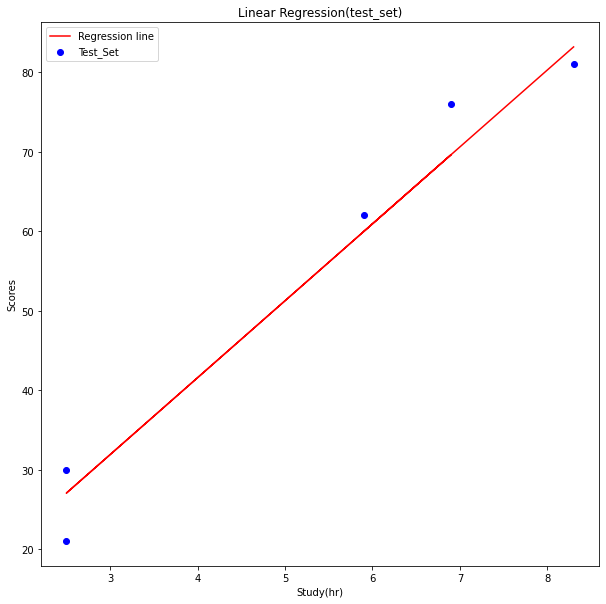

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.title('Linear Regression(test_set)')
plt.legend(['Regression line','Test_Set'],loc='best')
plt.xlabel('Study(hr)')
plt.ylabel('Scores')

Calculating error and score of model

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(f"MAE of linear regression model is {mean_absolute_error(y_test,y_pred):.2f}")
print(f"R2_score of linear regression model is {r2_score(y_test,y_pred):.2f}")

MAE of linear regression model is 3.92
R2_score of linear regression model is 0.97


Since R2 score is 0.97 it's a pretty good model and now we can predict the output of our input

In [28]:
#INPUT-What will be predicted score if a student studies for 9.25 hrs/ day?
ip=np.array(9.5)
ip=ip.reshape(1, -1)
op=model.predict(ip)

In [29]:
for i in op:
    ans=float(i)
print(f"The predicted score if a student studies for 9.25 hrs/ day is {ans:.2f}")

The predicted score if a student studies for 9.25 hrs/ day is 94.81
